In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pip install mysql-connector-python pandas scikit-learn

In [2]:
import mysql.connector

conn = mysql.connector.connect(
                                host = "localhost",
                                user = "root",
                                password = "",
                                database = "credit_risk_dataset"
                                )

In [3]:
query = "SELECT * FROM cred_data"
df = pd.read_sql(query, conn)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
miss = (df.isna().sum()/df.shape[0])*100
miss

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [7]:
missing_df = pd.DataFrame(data = miss , columns=["Missing values"])
missing_df['missing value count'] = df.isnull().sum()
missing_df

,Missing values,missing value count
person_age,0.0,0
person_income,0.0,0
person_home_ownership,0.0,0
person_emp_length,0.0,0
loan_intent,0.0,0
loan_grade,0.0,0
loan_amnt,0.0,0
loan_int_rate,0.0,0
loan_status,0.0,0
loan_percent_income,0.0,0


In [8]:
print(df[df['loan_int_rate'].isnull()].shape)
df[df['loan_int_rate'].isnull()].head()

(0, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [9]:
df[df.duplicated()].shape

(165, 12)

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(32416, 12)

In [12]:
df.dropna(inplace = True)

In [13]:
df.shape

(32416, 12)

In [14]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
X, y= df.drop('loan_status', axis=1), df['loan_status']
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [16]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [17]:
df['loan_status'].value_counts()

0    25327
1     7089
Name: loan_status, dtype: int64

In [18]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [19]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
        
print("categorical columns - ",'\n', cat)
print('\n')
print("numerical columns- ",'\n', num)

categorical columns -  
 ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


numerical columns-  
 ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


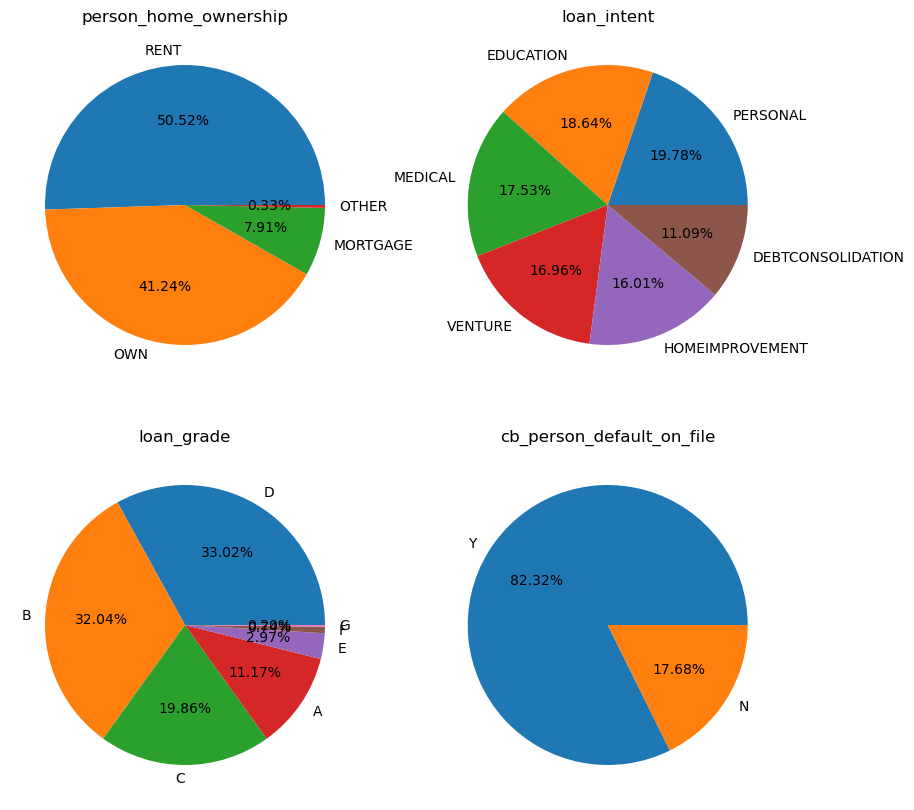

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

for i, ax in enumerate(axs.ravel()):
    if i < len(cat):
        
        ax.pie(df[cat[i]].value_counts(),
               labels=df[cat[i]].unique().tolist(),
               autopct='%1.2f%%')
        ax.set_title(cat[i])

plt.show()


df1 = pd.get_dummies(df, columns= cat)
df1

In [21]:
df1 = df.copy()

In [22]:
X, y= df1.drop('loan_status', axis=1), df1['loan_status']
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [23]:
X.shape

(32416, 11)

In [24]:
df[cat]
cat_ind = [X.columns.get_loc(col) for col in cat]
cat_ind

[2, 4, 5, 9]

In [25]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=cat_ind,random_state=42)

X, y = sm.fit_resample(X, y)

In [26]:
X.shape

(50654, 11)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40523, 11), (10131, 11), (40523,), (10131,))

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

tr = ColumnTransformer(transformers=[('tnf1',
                                     OneHotEncoder(sparse=False), 
                                     cat)],
                      remainder='passthrough')

X_train = tr.fit_transform(X_train)
X_test = tr.transform(X_test)
X.shape

(50654, 11)

In [30]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.000000,PERSONAL,D,35000,16.020000,0.590000,Y,3
1,21,9600,OWN,5.000000,EDUCATION,B,1000,11.140000,0.100000,N,2
2,25,9600,MORTGAGE,1.000000,MEDICAL,C,5500,12.870000,0.570000,N,3
3,23,65500,RENT,4.000000,MEDICAL,C,35000,15.230000,0.530000,N,2
4,24,54400,RENT,8.000000,MEDICAL,C,35000,14.270000,0.550000,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
50649,36,24000,RENT,1.786516,VENTURE,C,8000,13.630281,0.330000,N,13
50650,21,36000,RENT,1.447904,DEBTCONSOLIDATION,C,5000,13.980150,0.140000,N,2
50651,30,38000,RENT,1.560060,DEBTCONSOLIDATION,B,12000,12.303416,0.320000,N,5
50652,25,83236,RENT,0.504058,EDUCATION,D,25000,1.621805,0.265041,N,4


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_transformed = sc.fit_transform(X_train)
X_train_transformed

array([[-0.6902629 , -0.04796115, -0.23953953, ..., -0.01032212,
        -0.23064579,  0.89617621],
       [ 1.44872338, -0.04796115, -0.23953953, ...,  0.86857973,
        -0.7224805 ,  5.61002443],
       [ 1.44872338, -0.04796115, -0.23953953, ..., -0.9208554 ,
        -0.55853559, -0.41322607],
       ...,
       [ 1.44872338, -0.04796115, -0.23953953, ...,  0.51837463,
        -1.2143152 , -0.93698699],
       [-0.6902629 , -0.04796115, -0.23953953, ..., -0.9389305 ,
        -1.46023255, -0.93698699],
       [-0.6902629 , -0.04796115,  4.17467625, ...,  1.2639726 ,
        -1.3782601 , -0.67510653]])

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [33]:
lr.coef_, lr.intercept_

(array([[-0.12343877, -0.03737125, -0.4689692 ,  0.3415837 ,  0.19576709,
         -0.14353458,  0.13725079,  0.1395383 , -0.06474763, -0.27517188,
         -0.5133726 , -0.35185311, -0.1331847 ,  0.82551357,  0.38209671,
          0.2036412 ,  0.28213421,  0.08802604, -0.08802604,  0.04828143,
          0.11563085, -0.05903302, -0.7230488 ,  0.29183143,  1.66016282,
         -0.14689849]]),
 array([0.07747718]))

In [34]:
y_train_pred = lr.predict(X_train_transformed)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score1  = accuracy_score(y_train,y_train_pred)
accuracy_score1

0.8199294227969302

In [36]:
X_test_transformed = sc.transform(X_test)
y_test_pred = lr.predict(X_test_transformed)
y_test_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score2  = accuracy_score(y_test, y_test_pred)
accuracy_score2

0.8180831112427204

In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5089
           1       0.82      0.81      0.82      5042

    accuracy                           0.82     10131
   macro avg       0.82      0.82      0.82     10131
weighted avg       0.82      0.82      0.82     10131



In [39]:
confusion_matrix(y_test, y_test_pred)

array([[4225,  864],
       [ 979, 4063]], dtype=int64)

In [40]:
from sklearn.model_selection import validation_curve

arange = np.arange(1,100,2)
train_score, test_score = validation_curve(LogisticRegression(), 
                                           X, 
                                           y,
                                           cv=10, 
                                           param_name='C',
                                          param_range=1/arange,
                                          scoring='accuracy')

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Inverse Regularization Strength (1/C)")
plt.ylabel("Accuracy")
plt.semilogx(1/arange, train_mean, label="Training score", color="r")
plt.fill_between(
    1/arange, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r"
)
plt.semilogx(1/arange, test_mean, label="Cross-validation score", color="g")
plt.fill_between(
    1/arange, test_mean - test_std, test_mean + test_std, alpha=0.2, color="g"
)
plt.legend(loc="best")
plt.grid()
plt.show()


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [42]:
dc = DecisionTreeClassifier(random_state=0)

dc.fit(X_train_transformed, y_train)

dc_y_train_pred = dc.predict(X_train_transformed)

print("training accuracy - ", accuracy_score(y_train, dc_y_train_pred))

dc_y_test_pred = dc.predict(X_test_transformed)

print("testing accuracy - ",accuracy_score(y_test, dc_y_test_pred))

training accuracy -  1.0
testing accuracy -  0.899318922120225


In [43]:
rf = RandomForestClassifier()

rf.fit(X_train_transformed, y_train)

rf_y_train_pred = rf.predict(X_train_transformed)

print("training accuracy - ", accuracy_score(y_train, rf_y_train_pred))

rf_y_test_pred = rf.predict(X_test_transformed)

print("testing accuracy - ",accuracy_score(y_test, rf_y_test_pred))

training accuracy -  1.0
testing accuracy -  0.933076695291679


In [44]:
from sklearn.svm import LinearSVC

lsv = LinearSVC()

lsv.fit(X_train_transformed, y_train)

lsv_y_train_pred = lsv.predict(X_train_transformed)

print("training accuracy - ", accuracy_score(y_train, lsv_y_train_pred))

lsv_y_test_pred = lsv.predict(X_test_transformed)

print("testing accuracy - ",accuracy_score(y_test, lsv_y_test_pred))

training accuracy -  0.8202502282654295
testing accuracy -  0.8186753528773073


In [45]:
import xgboost as xgb

xg = xgb.XGBClassifier(objective='multi:softmax', num_class=2)

xg.fit(X_train_transformed, y_train)

xg_y_train_pred = xg.predict(X_train_transformed)

print("training accuracy - ", accuracy_score(y_train, xg_y_train_pred))

xg_y_test_pred = xg.predict(X_test_transformed)

print("testing accuracy - ",accuracy_score(y_test, xg_y_test_pred))

training accuracy -  0.9724847617402462
testing accuracy -  0.9507452373901886


In [46]:
import lightgbm as lgb

lg = lgb.LGBMClassifier()

lg.fit(X_train_transformed, y_train)

lg_y_train_pred = lg.predict(X_train_transformed)

print("training accuracy - ", accuracy_score(y_train, lg_y_train_pred))

lg_y_test_pred = lg.predict(X_test_transformed)

print("testing accuracy - ",accuracy_score(y_test, lg_y_test_pred))

training accuracy -  0.955802877378279
testing accuracy -  0.9451189418616128


In [47]:
from sklearn.pipeline import Pipeline

testing_pipe = Pipeline([
    ('OHE', tr),
    ('scaler', sc),
    ('xgb', xg)])

training_pipe = Pipeline([
    ('scaler', sc),
    ('xgb', xg)])

In [48]:
training_pipe.fit(X_train_transformed, y_train).score(X_test_transformed, y_test)

0.9507452373901886

In [49]:
array=np.array([22,59000,'RENT',123.0,'PERSONAL','D',35000,16.02,0.59,'Y',3])

temp_data = pd.DataFrame([array], columns= X.columns)  # Specify column names

testing_pipe.predict(temp_data)[0]

0

In [50]:
array=np.array([21,9600,'OWN',5.0,'EDUCATION','B',1000,11.14,0.1,'N',2])

temp_data = pd.DataFrame([array], columns= X.columns)  # Specify column names

testing_pipe.predict(temp_data)[0]

1

In [51]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(testing_pipe, file)

In [52]:
X_test_transformed.shape, y_test.shape

((10131, 26), (10131,))

In [53]:
y_pred = training_pipe.predict(X_test_transformed)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5089
           1       0.98      0.92      0.95      5042

    accuracy                           0.95     10131
   macro avg       0.95      0.95      0.95     10131
weighted avg       0.95      0.95      0.95     10131



In [55]:
confusion_matrix(y_test, y_pred)

array([[4983,  106],
       [ 393, 4649]], dtype=int64)

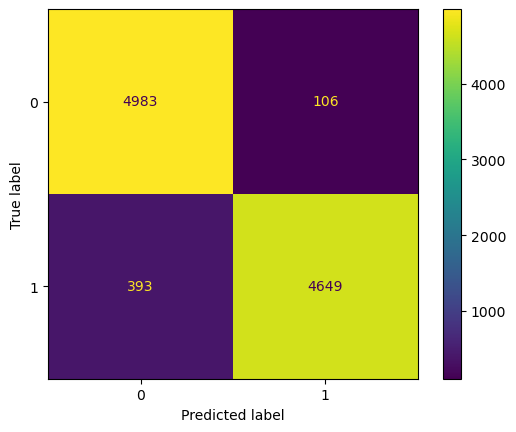

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(training_pipe, X_test_transformed, y_test)
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9777076761303891, 0.9220547401824672)

In [58]:
lg_training_pipe = Pipeline([
    ('scaler', sc),
    ('lg', lg)])

lg_training_pipe.fit(X_train_transformed, y_train).score(X_test_transformed, y_test)

y_pred_lg = lg_training_pipe.predict(X_test_transformed)

confusion_matrix(y_test, y_pred_lg)

array([[5004,   85],
       [ 471, 4571]], dtype=int64)

In [59]:
lsv_training_pipe = Pipeline([
    ('scaler', sc),
    ('lsv', lsv)])

lsv_training_pipe.fit(X_train_transformed, y_train).score(X_test_transformed, y_test)

y_pred_lsv = lsv_training_pipe.predict(X_test_transformed)

confusion_matrix(y_test, y_pred_lsv)

array([[4249,  840],
       [ 998, 4044]], dtype=int64)